<a href="https://colab.research.google.com/github/imambritish/aplikasi-Fuzzy-Inference-System/blob/main/bismillahFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PENERAPAN FUZZY INFERENCE SYSTEM METODE MAMDANI UNTUK PENENTUAN BESARAN PERSENTASE BEASISWA

**contoh kasus**

penerapan algoritma Fuzzy Inference System dengan metode MAMDANI untuk penentuan besaran persentase beasiswa mahasiswa baru, sehingga beasiswa 
diterima oleh calon mahasiswa tersebut tepat dan objektif.

**variabel**

variabel input : Nilai Test Tertulis, Hasil dari Wawancara, Nilai Raport, Penghasilan Orang Tua, Rekening Listrik sebulan terakhir

variabel output : Besarnya Beasiswa

**himpunan fuzzy**

himpunan nilai test tulis : RENDAH, TINGGI

himpunan rekening penggunaan listrik : IRIT, BOROS  

himpunan besaran penghasilan orangtua : KECIL, BESAR

himpunan besar beasiswa : RENDAH, SEDANG, TINGGI


**semesta pembicaraan**

semesta nilai test = [0, 100]

semesta penggunaan listrik(kWh) = [0 , +∞]

semesta penghasilan(rupiah) = [0 , +∞ ]

semesta besar beasiswa(persen) : [0 100]

**domain**

domain nilai test tulis : RENDAH = [40, 79] , TINGGI = [70, 90]

domain penggunaan listrik : IRIT [62 128], BOROS [108 180]

domain penghasilan : KECIL <= 2000000, BESAR >= 5000000

domain besar beasiswa(persen) : RENDAH <= 45,  30 <= SEDANG <= 70, TINGGI >= 60 

besaran golongan beasiswa mana yang akan didapat jika murid memiliki test tulis dengan nilai sekian, penghasilan orang tua dengan jumlah sekian, dan penggunaan listrik sekian kWh. 

## FUZZIFIKASI

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

KURVA UNTUK VARIABEL NILAI TEST TULIS

In [ ]:
def nilaiRendah():
  global x_nilai
  global a_nilaiRendah
  global c_nilaiRendah 
  global b_nilaiRendah
  global sbX_nilaiRendah
  global sbY_nilaiRendah


  print("Masukkan nilai test tulis dari siswa : ")
  x_nilai = int(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas bawah) : ")
  a_nilaiRendah = int(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas atas) : ")
  c_nilaiRendah = int(input()) 
  b_nilaiRendah = (a_nilaiRendah + c_nilaiRendah) / 2

  sbX_nilaiRendah = []
  sbY_nilaiRendah = []

  for i in range(a_nilaiRendah +1,c_nilaiRendah):

    sbX_nilaiRendah.append(i)
    if  i < (b_nilaiRendah):
      koordinatY = 1 - 2* pow(((i - a_nilaiRendah) / (c_nilaiRendah - a_nilaiRendah)),2)
      sbY_nilaiRendah.append(koordinatY)

    elif i > (b_nilaiRendah): 
      koordinatY = 2* pow(((c_nilaiRendah-i)/(c_nilaiRendah-a_nilaiRendah) ),2)
      sbY_nilaiRendah.append(koordinatY)

    elif i == (b_nilaiRendah):
      koordinatY = 0.5
      sbY_nilaiRendah.append(koordinatY)
    i += 1

  sbX_nilaiRendah.insert(0, a_nilaiRendah)
  sbX_nilaiRendah.insert(0, 0)
  sbX_nilaiRendah.append(c_nilaiRendah)
  sbX_nilaiRendah.append(100)

  sbY_nilaiRendah.insert(0, 1)
  sbY_nilaiRendah.insert(0, 1)
  sbY_nilaiRendah.append(0)
  sbY_nilaiRendah.append(0)

  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel nilai tes RENDAH')
  plt.show


Masukkan nilai test tulis dari siswa : 
76
Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas bawah) : 
40
Domain variabel fuzzy nilai test tulis di himpunan nilai test RENDAH (batas atas) : 
79


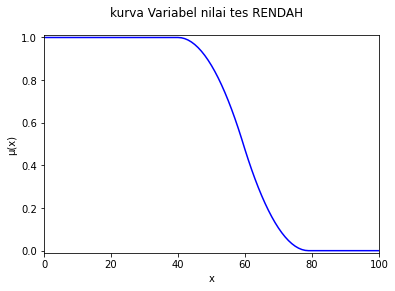

In [ ]:
nilaiRendah()

In [ ]:
def nilaiTinggi():
  global x_nilai
  global a_nilaiTinggi
  global c_nilaiTinggi
  global b_nilaiTinggi
  global sbX_nilaiTinggi
  global sbY_nilaiTinggi

  print("Nilai test tulis dari siswa yang sudah di inputkan : {nilaiTes}".format(nilaiTes = x_nilai))
  
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas bawah) : ")
  a_nilaiTinggi = int(input())
  print("Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas atas) :")
  c_nilaiTinggi = int(input()) 
  b_nilaiTinggi = (a_nilaiTinggi + c_nilaiTinggi) / 2

  sbX_nilaiTinggi = []
  sbY_nilaiTinggi = []

  for i in range(a_nilaiTinggi +1,c_nilaiTinggi):

    sbX_nilaiTinggi.append(i)
    if  i < (b_nilaiTinggi):
      koordinatY = 2* pow(((i- a_nilaiTinggi)/(c_nilaiTinggi - a_nilaiTinggi) ),2)
      sbY_nilaiTinggi.append(koordinatY)

    elif i > (b_nilaiTinggi): 
      koordinatY = 1 - 2* pow(((c_nilaiTinggi - i) / (c_nilaiTinggi - a_nilaiTinggi)),2)
      sbY_nilaiTinggi.append(koordinatY)

    elif i == (b_nilaiTinggi):
      koordinatY = 0.5
      sbY_nilaiTinggi.append(koordinatY)
    i += 1
    
  sbX_nilaiTinggi.insert(0, a_nilaiTinggi)
  sbX_nilaiTinggi.insert(0, 0)
  sbX_nilaiTinggi.append(c_nilaiTinggi)
  sbX_nilaiTinggi.append(100)

  sbY_nilaiTinggi.insert(0, 0)
  sbY_nilaiTinggi.insert(0, 0)
  sbY_nilaiTinggi.append(1)
  sbY_nilaiTinggi.append(1)
  

  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel nilai tes TINGGI')
  plt.show


Nilai test tulis dari siswa yang sudah di inputkan : 76
Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas bawah) : 
70
Domain variabel fuzzy nilai test tulis di himpunan nilai test TINGGI (batas atas) :
90


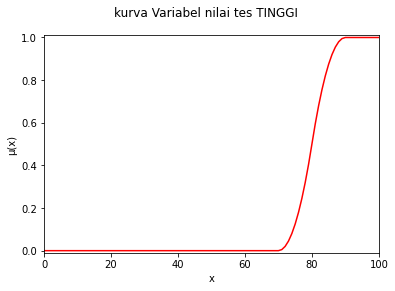

In [ ]:
nilaiTinggi()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel nilai tes atau nilai tes tulis yang didapat siswa calon penerima beasiswa. 

In [ ]:
def μNilaiRENDAH():
  global μNilaiRENDAH 

  if x_nilai >= (c_nilaiRendah):
    μNilaiRENDAH = 0

  elif  x_nilai < (b_nilaiRendah):
    μNilaiRENDAH = 1 - 2* pow(((x_nilai - a_nilaiRendah) / (c_nilaiRendah - a_nilaiRendah)),2)
    
  elif x_nilai > (b_nilaiRendah): 
    μNilaiRENDAH = 2* pow(((c_nilaiRendah-x_nilai)/(c_nilaiRendah-a_nilaiRendah) ),2)
    
  elif x_nilai == (b_nilaiRendah):
    μNilaiRENDAH = 0.5

  elif x_nilai <= (a_nilaiRendah):
    μNilaiRENDAH = 1

    
  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))


  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'g--') 
  
  plt.plot([x_nilai], [μNilaiRENDAH], 'go')
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes Himpunan RENDAH')
  

  plt.show

Untuk nilai tes tulis sebesar 76 nilai μNilaiRENDAH adalah : 0.01183431952662722


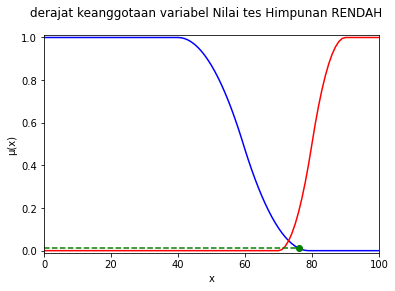

In [ ]:
μNilaiRENDAH()

In [ ]:
def μNilaiTINGGI():
  if x_nilai <= (a_nilaiTinggi):
    μNilaiTINGGI = 0

  elif  x_nilai < (b_nilaiTinggi):
    μNilaiTINGGI = 2* pow(((x_nilai- a_nilaiTinggi)/(c_nilaiTinggi - a_nilaiTinggi) ),2)
    

  elif x_nilai > (b_nilaiTinggi): 
    μNilaiTINGGI = 1 - 2* pow(((c_nilaiTinggi - x_nilai) / (c_nilaiTinggi - a_nilaiTinggi)),2)
    

  elif x_nilai == (b_nilaiTinggi):
    μNilaiTINGGI = 0.5

  elif x_nilai >= (c_nilaiTinggi):
    μNilaiTINGGI = 1
    
    
  print("Untuk nilai tes tulis sebesar {nilaiTest} nilai μNilaiTINGGI adalah : {derajatNilaiTINGGI}" 
        .format(nilaiTest = x_nilai, derajatNilaiTINGGI = μNilaiTINGGI))

  print("Untuk nilai tes tulis sebesar {nilaiTes} nilai μNilaiRENDAH adalah : {derajatNilaiRendah}" 
        .format(nilaiTes = x_nilai, derajatNilaiRendah = μNilaiRENDAH))

  plt.plot(sbX_nilaiRendah,sbY_nilaiRendah, color = 'blue') 
  plt.plot(sbX_nilaiTinggi,sbY_nilaiTinggi, color = 'red') 
  plt.plot([0,x_nilai,x_nilai],[μNilaiRENDAH,μNilaiRENDAH,0], 'g--')
  plt.plot([0,x_nilai,x_nilai],[μNilaiTINGGI,μNilaiTINGGI,0], 'g--') 
  plt.plot([x_nilai], [μNilaiRENDAH], 'go')
  plt.plot([x_nilai], [μNilaiTINGGI], 'go')
  plt.axis([0, 100, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel Nilai tes himpunan TINGGI')
  

  plt.show

Untuk nilai tes tulis sebesar 76 nilai μNilaiTINGGI adalah : 0.18
Untuk nilai tes tulis sebesar 76 nilai μNilaiRENDAH adalah : 0.01183431952662722


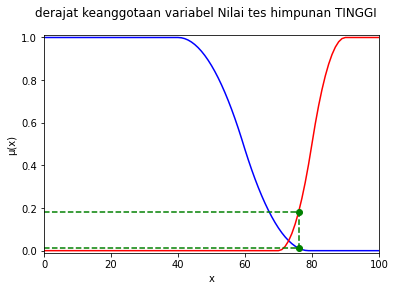

In [ ]:
μNilaiTINGGI()

KURVA UNTUK VARIABEL PENGGUNAAN LISTRIK

In [ ]:
def listrikIRIT():
  global x_listrik
  global a_listrikIrit
  global c_listrikIrit
  global b_listrikIrit
  global sbX_listrikIrit
  global sbY_listrikIrit


  print("Masukkan besar kWh penggunaan listrik rumah siswa : ")
  x_listrik = int(input())
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik IRIT (batas bawah) : ")
  a_listrikIrit = int(input())
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik IRIT (batas bawah) : ")
  c_listrikIrit = int(input()) 
  b_listrikIrit = (a_listrikIrit + c_listrikIrit) / 2

  sbX_listrikIrit = []
  sbY_listrikIrit = []

  for i in range(a_listrikIrit +1,c_listrikIrit):

    sbX_listrikIrit.append(i)
    if  i < (b_listrikIrit):
      koordinatY = 1 - 2* pow(((i - a_listrikIrit) / (c_listrikIrit - a_listrikIrit)),2)
      sbY_listrikIrit.append(koordinatY)

    elif i > (b_listrikIrit): 
      koordinatY = 2* pow(((c_listrikIrit-i)/(c_listrikIrit-a_listrikIrit) ),2)
      sbY_listrikIrit.append(koordinatY)

    elif i == (b_listrikIrit):
      koordinatY = 0.5
      sbY_listrikIrit.append(koordinatY)
    i += 1

  sbX_listrikIrit.insert(0, a_listrikIrit)
  sbX_listrikIrit.insert(0, 0)
  sbX_listrikIrit.append(c_listrikIrit)
  sbX_listrikIrit.append(c_listrikIrit + 200)

  sbY_listrikIrit.insert(0, 1)
  sbY_listrikIrit.insert(0, 1)
  sbY_listrikIrit.append(0)
  sbY_listrikIrit.append(0)

  plt.plot(sbX_listrikIrit,sbY_listrikIrit, color = 'blue') 
  plt.axis([0, c_listrikIrit + 10, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel listrik penggunaan IRIT')
  plt.show


Masukkan besar kWh penggunaan listrik rumah siswa : 
160
Domain variabel fuzzy penggunaan listrik di himpunan listrik IRIT (batas bawah) : 
62
Domain variabel fuzzy penggunaan listrik di himpunan listrik IRIT (batas bawah) : 
128


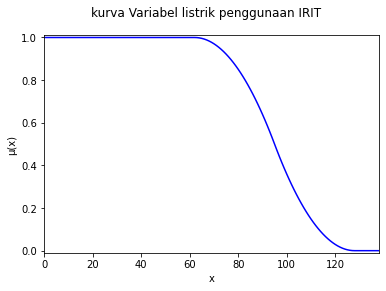

In [ ]:
listrikIRIT()

In [ ]:
def listrikBOROS():
  global x_listrik
  global a_listrikBoros
  global c_listrikBoros
  global b_listrikBoros
  global sbX_listrikBoros
  global sbY_listrikBoros

  print("jumlah kWh penggunaan listrik siswa yang sudah di inputkan : {listrik}".format(listrik = x_listrik))
  
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas bawah) : ")
  a_listrikBoros = int(input())
  print("Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas atas) : ")
  c_listrikBoros = int(input()) 
  b_listrikBoros = (a_listrikBoros + c_listrikBoros) / 2

  sbX_listrikBoros = []
  sbY_listrikBoros = []

  for i in range(a_listrikBoros +1,c_listrikBoros):

    sbX_listrikBoros.append(i)
    if  i < (b_listrikBoros):
      koordinatY = 2* pow(((i- a_listrikBoros)/(c_listrikBoros - a_listrikBoros) ),2)
      sbY_listrikBoros.append(koordinatY)

    elif i > (b_listrikBoros): 
      koordinatY = 1 - 2* pow(((c_listrikBoros - i) / (c_listrikBoros- a_listrikBoros)),2)
      sbY_listrikBoros.append(koordinatY)

    elif i == (b_listrikBoros):
      koordinatY = 0.5
      sbY_listrikBoros.append(koordinatY)
    i += 1

  sbX_listrikBoros.insert(0, a_listrikBoros)
  sbX_listrikBoros.insert(0, 0)
  sbX_listrikBoros.append(c_listrikBoros)
  sbX_listrikBoros.append(c_listrikBoros + 30)

  sbY_listrikBoros.insert(0, 0)
  sbY_listrikBoros.insert(0, 0)
  sbY_listrikBoros.append(1)
  sbY_listrikBoros.append(1)
  

  plt.plot(sbX_listrikBoros,sbY_listrikBoros, color = 'red') 
  plt.axis([0, c_listrikBoros + 30, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('kurva Variabel listrik penggunaan BOROS')
  plt.show


jumlah kWh penggunaan listrik siswa yang sudah di inputkan : 160
Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas bawah) : 
108
Domain variabel fuzzy penggunaan listrik di himpunan listrik BOROS (batas atas) : 
180


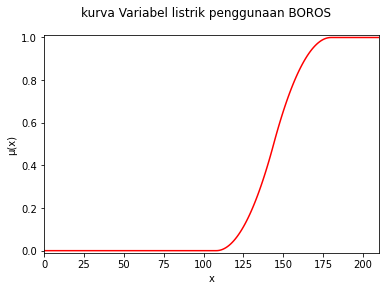

In [ ]:
listrikBOROS()

Langkah selanjutnya menentukan derajat keanggotaan untuk variabel data rekening listrik sebulan terakhir calon penerima beasiswa. 

In [ ]:
def μListrikIRIT():
  global μListrikIRIT 

  if x_listrik >= (c_listrikIrit):
    μListrikIRIT = 0

  elif  x_listrik < (b_listrikIrit):
    μListrikIRIT = 1 - 2* pow(((x_listrik - a_listrikIrit) / (c_listrikIrit - a_listrikIrit)),2)
    
  elif x_listrik > (b_listrikIrit): 
    μListrikIRIT = 2* pow(((c_listrikIrit-x_listrik)/(c_listrikIrit - a_listrikIrit) ),2)
    
  elif x_listrik == (b_listrikIrit):
    μListrikIRIT = 0.5

  elif x_listrik <= (a_listrikIrit):
    μListrikIRIT = 1

    
  print("Untuk penggunaan listrik sebesar {kWh} kWh nilai μListrikIRIT adalah : {derajatListrikIrit}" 
        .format(kWh = x_listrik, derajatListrikIrit = μListrikIRIT))


  plt.plot(sbX_listrikIrit,sbY_listrikIrit, color = 'blue') 
  plt.plot(sbX_listrikBoros,sbY_listrikBoros, color = 'red') 
  plt.plot([0,x_listrik,x_listrik],[μListrikIRIT,μListrikIRIT,0], 'g--') 
  
  plt.plot([x_listrik], [μListrikIRIT], 'go')
  plt.axis([0, c_listrikBoros + 30, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel penggunaan listrik Himpunan IRIT')
  

  plt.show

Untuk penggunaan listrik sebesar 160 kWh nilai μListrikIRIT adalah : 0


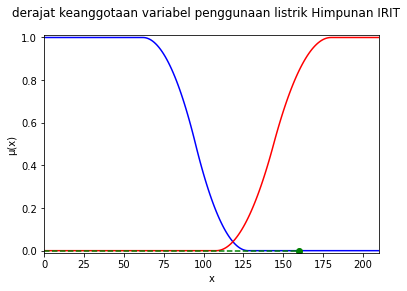

In [ ]:
μListrikIRIT()

In [ ]:
def μListrikBOROS():
  if x_listrik <= (a_listrikBoros):
    μListrikBOROS = 0

  elif  x_listrik < (b_listrikBoros):
    μListrikBOROS = 2* pow(((x_listrik- a_listrikBoros)/(c_listrikBoros - a_listrikBoros) ),2)
    

  elif x_listrik > (b_listrikBoros): 
    μListrikBOROS = 1 - 2* pow(((c_listrikBoros- x_listrik) / (c_listrikBoros - a_listrikBoros)),2)
    

  elif x_listrik == (b_listrikBoros):
    μListrikBOROS = 0.5

  elif x_listrik >= (c_listrikBoros):
    μListrikBOROS = 1
    
    
  print("Untuk penggunaan listrik sebesar {kWh} nilai μListrikIRIT adalah : {derajatListrikIrit}" 
        .format(kWh = x_listrik, derajatListrikIrit = μListrikIRIT))
  
  print("Untuk penggunaan listrik sebesar {kWh} nilai μListrikBOROS adalah : {derajatListrikBOROS}" 
        .format(kWh = x_listrik, derajatListrikBOROS = μListrikBOROS))


  plt.plot(sbX_listrikIrit,sbY_listrikIrit, color = 'blue') 
  plt.plot(sbX_listrikBoros,sbY_listrikBoros, color = 'red') 
  plt.plot([0,x_listrik,x_listrik],[μListrikIRIT,μListrikIRIT,0], 'g--')
  plt.plot([0,x_listrik,x_listrik],[μListrikBOROS,μListrikBOROS,0], 'g--') 
  plt.plot([x_listrik], [μListrikIRIT], 'go')
  plt.plot([x_listrik], [μListrikBOROS], 'go')
  plt.axis([0, c_listrikBoros + 30, -0.01 ,1.01])
  plt.xlabel('x')
  plt.ylabel('μ(x)')
  plt.suptitle('derajat keanggotaan variabel penggunaan listrik Himpunan BOROS')
  

  plt.show

Untuk penggunaan listrik sebesar 160 nilai μListrikIRIT adalah : 0
Untuk penggunaan listrik sebesar 160 nilai μListrikBOROS adalah : 0.845679012345679


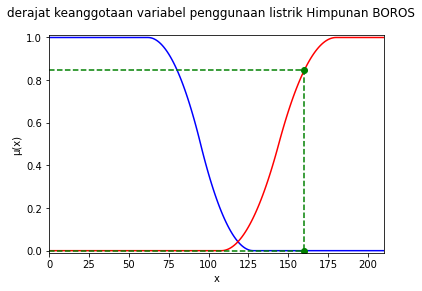

In [ ]:
μListrikBOROS()